In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
rtf = pd.read_csv(r'ts_train_features.csv')
rtl = pd.read_csv(r'ts_train_labels.csv')
stf = pd.read_csv(r'/users/pvankatw/emulator/untracked_folder/ml_data/ts_train_features.csv')
stl = pd.read_csv(r'/users/pvankatw/emulator/untracked_folder/ml_data/ts_train_labels.csv')
data = rtf.copy()
data['true'] = rtl

In [34]:
stf.columns

Index(['sectors', 'regions', 'year', 'salinity', 'temperature',
       'thermal_forcing', 'pr_anomaly', 'evspsbl_anomaly', 'mrro_anomaly',
       'smb_anomaly', 'ts_anomaly', 'rhoi', 'rhow', 'ice_shelf_fracture',
       'tier', 'salinity.lag1', 'temperature.lag1', 'thermal_forcing.lag1',
       'pr_anomaly.lag1', 'evspsbl_anomaly.lag1', 'mrro_anomaly.lag1',
       'smb_anomaly.lag1', 'ts_anomaly.lag1', 'salinity.lag2',
       'temperature.lag2', 'thermal_forcing.lag2', 'pr_anomaly.lag2',
       'evspsbl_anomaly.lag2', 'mrro_anomaly.lag2', 'smb_anomaly.lag2',
       'ts_anomaly.lag2', 'salinity.lag3', 'temperature.lag3',
       'thermal_forcing.lag3', 'pr_anomaly.lag3', 'evspsbl_anomaly.lag3',
       'mrro_anomaly.lag3', 'smb_anomaly.lag3', 'ts_anomaly.lag3',
       'salinity.lag4', 'temperature.lag4', 'thermal_forcing.lag4',
       'pr_anomaly.lag4', 'evspsbl_anomaly.lag4', 'mrro_anomaly.lag4',
       'smb_anomaly.lag4', 'ts_anomaly.lag4', 'salinity.lag5',
       'temperature.lag5', 't

In [61]:
rtf.drop_duplicates()

,regions,year,salinity,temperature,thermal_forcing,pr_anomaly,evspsbl_anomaly,mrro_anomaly,smb_anomaly,ts_anomaly,...,exp_id-exp06,exp_id-exp07,exp_id-exp08,exp_id-exp09,exp_id-exp10,exp_id-exp11,exp_id-exp12,exp_id-exp13,exp_id-expA1,exp_id-expA5
0,0.0,0.000000,0.980514,0.337446,0.341841,0.291636,0.578188,0.057578,0.264297,0.092220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.011905,1.000000,0.346341,0.351147,0.288066,0.522934,0.051443,0.273656,0.189055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.023810,0.999416,0.353328,0.358186,0.305909,0.262534,0.063350,0.349550,0.127049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.035714,0.991700,0.357124,0.361915,0.293255,0.362616,0.057311,0.313919,0.167959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.047619,0.973459,0.354134,0.359036,0.282892,0.356082,0.060433,0.302583,0.194417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26090,1.0,0.952381,0.617926,0.565591,0.566311,0.559222,0.604864,0.262416,0.527345,0.594587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26091,1.0,0.964286,0.575652,0.540469,0.540684,0.586226,0.548941,0.368915,0.548490,0.715674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26092,1.0,0.976190,0.544367,0.532292,0.532106,0.601085,0.450796,0.305125,0.601211,0.750602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26093,1.0,0.988095,0.532991,0.521214,0.521019,0.598331,0.548251,0.378682,0.560702,0.789561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
rtf[(rtf.regions==0.0) & (rtf['exp_id-exp05'] == 1.0) & (rtf['modelname-IMAU_IMAUICE1'] == 0.0) & (rtf['year'] == 0.0)].to_csv(r'test.csv')
# rtf[(rtf.regions==0.0) & (rtf['exp_id-exp05'] == 1.0) & (rtf['modelname-IMAU_IMAUICE1'] == 0.0) ]

In [52]:
rtf.groupby(by=['regions', 'year', 'exp_id-exp05', 'modelname-IMAU_IMAUICE1']).mean()

salinity  temperature  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                          
0.0     0.000000 0.0          0.0                      0.961722     0.347566   
                              1.0                      0.965836     0.343217   
                 1.0          0.0                      0.980514     0.337446   
        0.011905 0.0          0.0                      0.969683     0.350263   
                              1.0                      0.977226     0.347264   
...                                                         ...          ...   
1.0     0.988095 1.0          1.0                      0.709224     0.791898   
        1.000000 0.0          0.0                      0.641640     0.725039   
                              1.0                      0.700959     0.709175   
                 1.0          0.0                      0.742995     0.813518   
                              1.0                      0.742995     0.813518   

                                                       thermal_forcing  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                    
0.0     0.000000 0.0          0.0                             0.351924   
                              1.0                             0.347532   
                 1.0          0.0                             0.341841   
        0.011905 0.0          0.0                             0.354815   
                              1.0                             0.351739   
...                                                                ...   
1.0     0.988095 1.0          1.0                             0.794763   
        1.000000 0.0          0.0                             0.727025   
                              1.0                             0.711619   
                 1.0          0.0                             0.816929   
                              1.0                             0.816929   

                                                       pr_anomaly  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1               
0.0     0.000000 0.0          0.0                        0.293845   
                              1.0                        0.293178   
                 1.0          0.0                        0.291636   
        0.011905 0.0          0.0                        0.312478   
                              1.0                        0.316907   
...                                                           ...   
1.0     0.988095 1.0          1.0                        0.254352   
        1.000000 0.0          0.0                        0.494804   
                              1.0                        0.430726   
                 1.0          0.0                        0.218532   
                              1.0                        0.218532   

                                                       evspsbl_anomaly  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                    
0.0     0.000000 0.0          0.0                             0.427688   
                              1.0                             0.453503   
                 1.0          0.0                             0.578188   
        0.011905 0.0          0.0                             0.413992   
                              1.0                             0.446767   
...                                                                ...   
1.0     0.988095 1.0          1.0                             0.400307   
        1.000000 0.0          0.0                             0.424973   
                              1.0                             0.409517   
                 1.0          0.0                             0.354234   
                              1.0                             0.354234   

                                                       mrro_anomaly  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                 
0.0     0.000000 0.0          0.0               

In [39]:
stf.groupby(by=['regions', 'year', 'exp_id-exp05', 'modelname-IMAU_IMAUICE1']).mean()

sectors  salinity  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                       
0.0     0.000000 0.0          0.0                      0.108849  0.928057   
                              1.0                      0.097187  0.910319   
                 1.0          0.0                      0.107563  0.931532   
                              1.0                      0.137255  0.952230   
        0.011905 0.0          0.0                      0.108849  0.931061   
...                                                         ...       ...   
1.0     0.988095 1.0          1.0                      0.941176  0.835799   
        1.000000 0.0          0.0                      0.940944  0.818796   
                              1.0                      0.941176  0.821511   
                 1.0          0.0                      0.941176  0.854436   
                              1.0                      0.941176  0.846332   

                                                       temperature  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                
0.0     0.000000 0.0          0.0                         0.494047   
                              1.0                         0.525512   
                 1.0          0.0                         0.503869   
                              1.0                         0.330764   
        0.011905 0.0          0.0                         0.494613   
...                                                            ...   
1.0     0.988095 1.0          1.0                         0.640725   
        1.000000 0.0          0.0                         0.618081   
                              1.0                         0.582255   
                 1.0          0.0                         0.659973   
                              1.0                         0.649698   

                                                       thermal_forcing  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                    
0.0     0.000000 0.0          0.0                             0.488948   
                              1.0                             0.520376   
                 1.0          0.0                             0.498859   
                              1.0                             0.324515   
        0.011905 0.0          0.0                             0.489584   
...                                                                ...   
1.0     0.988095 1.0          1.0                             0.635273   
        1.000000 0.0          0.0                             0.612255   
                              1.0                             0.576056   
                 1.0          0.0                             0.655024   
                              1.0                             0.644515   

                                                       pr_anomaly  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1               
0.0     0.000000 0.0          0.0                        0.311089   
                              1.0                        0.302290   
                 1.0          0.0                        0.318151   
                              1.0                        0.327049   
        0.011905 0.0          0.0                        0.329597   
...                                                           ...   
1.0     0.988095 1.0          1.0                        0.268768   
        1.000000 0.0          0.0                        0.452162   
                              1.0                        0.345070   
                 1.0          0.0                        0.243797   
                              1.0                        0.240352   

                                                       evspsbl_anomaly  \
regions year     exp_id-exp05 modelname-IMAU_IMAUICE1                    
0.0     0.000000 0.0          0.0                             0.372028   
                              1.0                           

In [31]:
true_mean = np.array(data.groupby(by=['year']).mean()['true'])

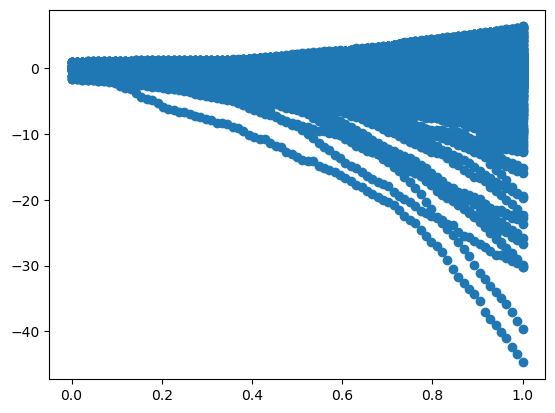

In [32]:
plt.plot(data.year, data.true, 'o')

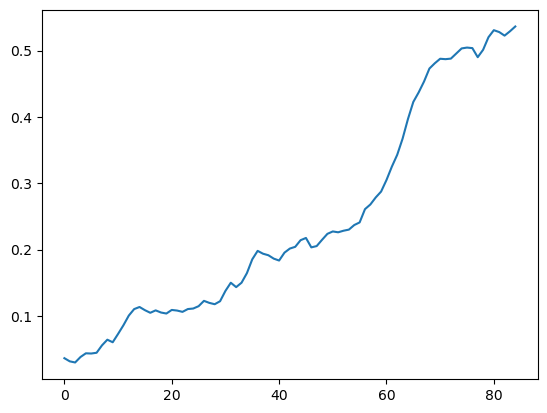

In [26]:
plt.plot( true_mean)

In [54]:
results = pd.read_csv(r'/users/pvankatw/emulator/untracked_folder/analyze_model/results.csv')

In [58]:
regional_results = results.groupby(by=['regions', 'modelname', 'exp_id', 'year']).mean()
regional_train_labels
# regional_features = 

sectors  salinity  temperature  \
regions modelname exp_id year                                    
0.0     AWI_PISM1 exp01  2016  0.176471  0.802943     0.438330   
                         2017  0.176471  0.810917     0.441442   
                         2018  0.176471  0.806371     0.436421   
                         2019  0.176471  0.800383     0.433516   
                         2020  0.176471  0.793097     0.434697   
...                                 ...       ...          ...   
1.0     VUW_PISM  exp03  2096  0.911765  0.957965     0.504814   
                         2097  0.911765  0.965136     0.515460   
                         2098  0.911765  0.956173     0.510205   
                         2099  0.911765  0.951366     0.516196   
                         2100  0.911765  0.956289     0.516238   

                               thermal_forcing  pr_anomaly  evspsbl_anomaly  \
regions modelname exp_id year                                                 
0.0     AWI_PISM1 exp01  2016         0.430512    0.160937         0.388928   
                         2017         0.433781    0.216905         0.479247   
                         2018         0.428658    0.313163         0.330974   
                         2019         0.425602    0.427764         0.330623   
                         2020         0.426660    0.284018         0.300057   
...                                        ...         ...              ...   
1.0     VUW_PISM  exp03  2096         0.500269    0.363193         0.389752   
                         2097         0.511101    0.153331         0.283823   
                         2098         0.505687    0.397831         0.346938   
                         2099         0.511631    0.283332         0.386266   
                         2100         0.511732    0.257853         0.311854   

                               mrro_anomaly  smb_anomaly  ts_anomaly  \
regions modelname exp_id year                                          
0.0     AWI_PISM1 exp01  2016      0.067727     0.218315    0.156762   
                         2017      0.059539     0.231368    0.301699   
                         2018      0.070108     0.419270    0.184451   
                         2019      0.069918     0.546444    0.230977   
                         2020      0.069308     0.404985    0.205343   
...                                     ...          ...         ...   
1.0     VUW_PISM  exp03  2096      0.071505     0.440517    0.223604   
                         2097      0.064326     0.271281    0.154353   
                         2098      0.068413     0.504468    0.249260   
                         2099      0.064343     0.356544    0.235559   
                         2100      0.062104     0.371732    0.092685   

                                   rhoi  rhow  ice_shelf_fracture  tier  \
regions modelname exp_id year                                             
0.0     AWI_PISM1 exp01  2016  0.555556   0.0                 0.0   0.0   
                         2017  0.555556   0.0                 0.0   0.0   
                         2018  0.555556   0.0                 0.0   0.0   
                         2019  0.555556   0.0                 0.0   0.0   
                         2020  0.555556   0.0                 0.0   0.0   
...                                 ...   ...                 ...   ...   
1.0     VUW_PISM  exp03  2096  0.555556   1.0                 0.0   0.0   
                         2097  0.555556   1.0                 0.0   0.0   
                         2098  0.555556   1.0                 0.0   0.0   
                         2099  0.555556   1.0                 0.0   0.0   
                         2100  0.555556   1.0                 0.0   0.0   

                                   true      pred       mse       mae  \
regions modelname exp_id year                                           
0.0     AWI_PISM1 exp01  2016 -0.059214  0.138428  0.039062  0.197642   
             

In [59]:
regional_results.columns

Index(['sectors', 'salinity', 'temperature', 'thermal_forcing', 'pr_anomaly',
       'evspsbl_anomaly', 'mrro_anomaly', 'smb_anomaly', 'ts_anomaly', 'rhoi',
       'rhow', 'ice_shelf_fracture', 'tier', 'true', 'pred', 'mse', 'mae',
       'sd', 'upper_bound', 'lower_bound'],
      dtype='object')